In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import zoom
from scipy.special import logsumexp
from scipy.misc import face

import deepgaze_pytorch

<h3>Downloading model</h3>

In [2]:
DEVICE = 'cpu'

model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)

c:\Users\weeck\miniconda3\envs\pytorchEnv\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\weeck\miniconda3\envs\pytorchEnv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\weeck/.cache\torch\hub\pytorch_vision_v0.6.0
c:\Users\weeck\miniconda3\envs\pytorchEnv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using cache found in C:\Users\weeck/.cache\torch\hub\pytorch_vision_v0.6.0
c:\Users\weeck\miniconda3\envs\pytorchEnv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  war

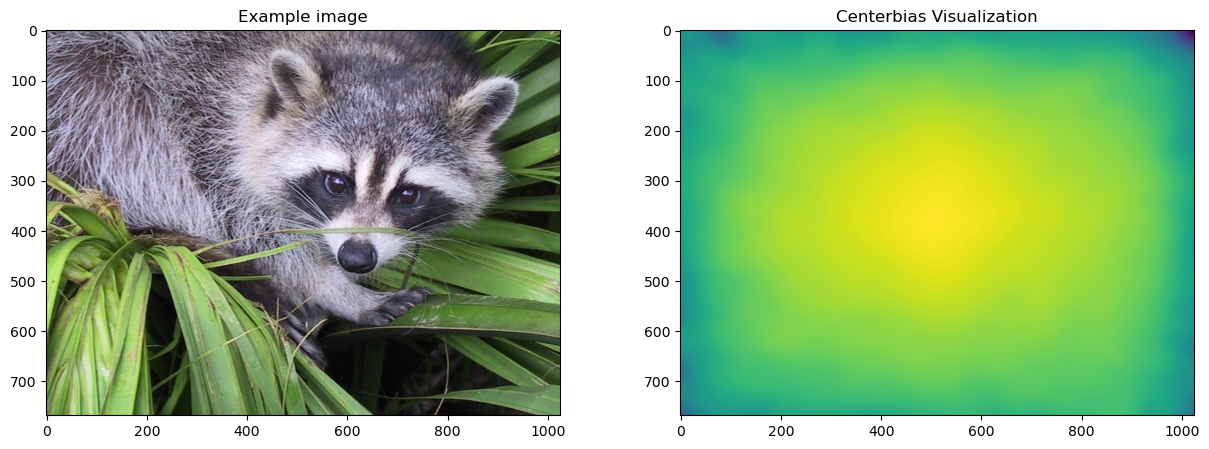

In [4]:
# Load example image
image = face()

# Loading centerbias (1024x1024 pixels)
centerbias_template = np.load('centerBias/centerbias_mit1003.npy')
# Adjusting the centerbias to the image size (768x1024 pixels)
centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
# Renormalize log density
centerbias -= logsumexp(centerbias)

# Display 
fig, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].imshow(image), ax[0].set_title('Example image')
ax[1].imshow(centerbias), ax[1].set_title('Centerbias Visualization')
plt.show()

In [5]:
image_tensor = torch.tensor(np.array([image.transpose(2, 0, 1)])).to(DEVICE)
centerbias_tensor = torch.tensor(np.array([centerbias])).to(DEVICE)

C:\Users\weeck\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  """Entry point for launching an IPython kernel.


In [41]:
log_density_prediction = model(image_tensor, centerbias_tensor)

[-23.79111623 -23.76881886 -23.74959711 ... -10.26370637 -10.26350666
 -10.26350007]


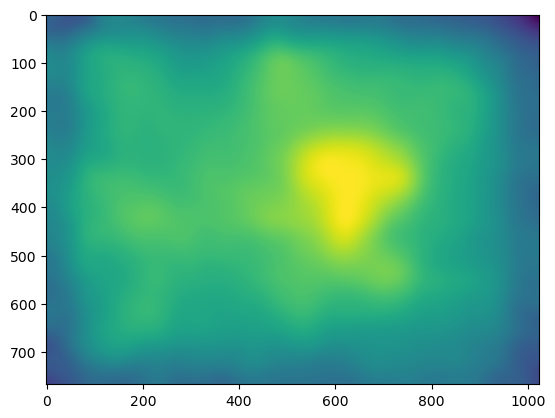

In [40]:
numpy_array = log_density_prediction.detach().numpy()[0][0]

print(np.unique(numpy_array))
plt.imshow(numpy_array)